### Loading Files

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('online_retail.csv')
data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Data Description

In [3]:
data.shape

(541909, 9)

In [4]:
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [7]:
# data.isnull().sum()
data.isna().sum()                                     # Many Missing Values in Desc and CustID

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data.duplicated().sum()                               # No Duplicates   

0

## Initial Dataset Visuals

In [10]:
original_data = data.copy()

In [11]:
original_data[['Date', 'Time']] = data['InvoiceDate'].str.split(' ', expand=True)

In [12]:
original_data.drop(columns=['InvoiceDate', 'index'], inplace=True)

In [13]:
original_data['Date'] = pd.to_datetime(original_data['Date'])

In [14]:
original_data['Sum'] = original_data['Quantity'] * original_data['UnitPrice']

In [15]:
original_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50,16.60


### By Country

In [18]:
original_data_by_Country = original_data.groupby('Country')['Quantity'].sum().reset_index()

In [19]:
original_data_by_Country = original_data_by_Country.sort_values(by='Quantity', ascending=False)

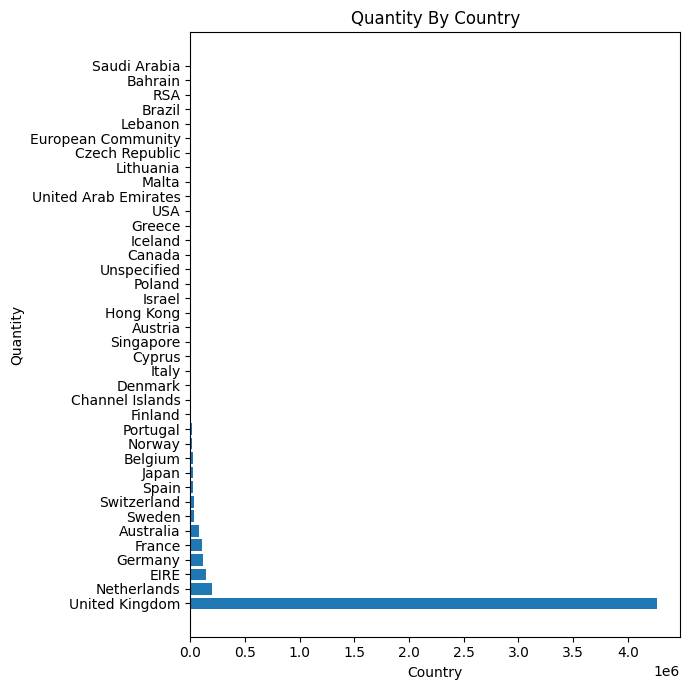

In [20]:
plt.figure(figsize=(7,7))
plt.barh(original_data_by_Country['Country'], original_data_by_Country['Quantity'])
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity By Country')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4752\3803531462.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4752\3803531462.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma_r')


NameError: name 'make_axes_locatable' is not defined

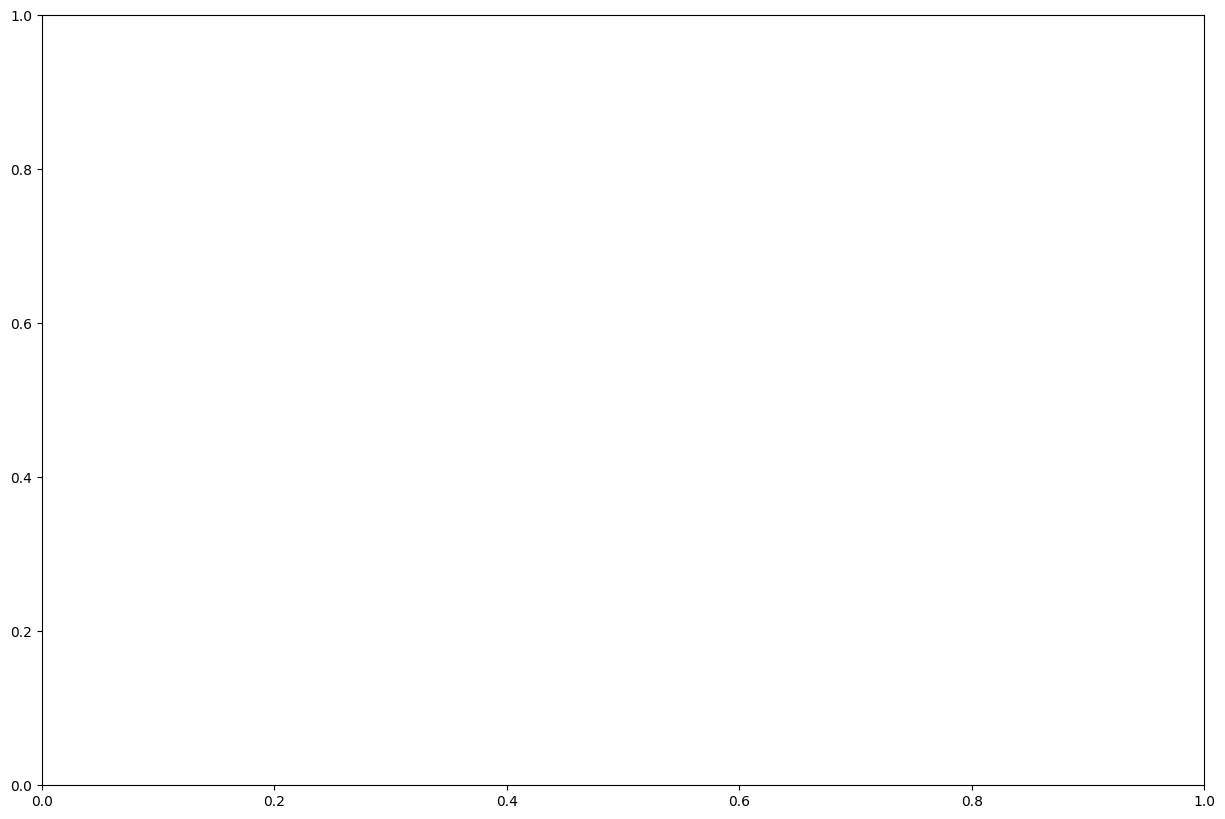

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# Group the data by 'Country' and sum the 'Quantity' for each country
total_quantity_by_country = data.groupby('Country')['Quantity'].sum().reset_index()

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with total quantity by country
world = world.merge(total_quantity_by_country, how='left', left_on='name', right_on='Country')

# Define colormap with lighter colors representing higher sales and darker colors representing lower sales
norm = Normalize(vmin=world['Quantity'].min(), vmax=world['Quantity'].max())
cmap = cm.get_cmap('plasma_r')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='Quantity', ax=ax, legend=True, cax=cax, cmap=cmap, norm=norm, legend_kwds={'label': "Total Quantity by Country"})
ax.set_title('Total Quantity of Items Sold by Country')
plt.show()


## Cleaning Data

### Cleaning...

In [16]:
data = original_data
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
Time                0
Sum                 0
dtype: int64

In [23]:
rows_with_empty_description = data[data['Description'].isna()]                   # or isnull()
rows_with_empty_description
# (rows_with_empty_description.UnitPrice != 0).count()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
622,536414,22139,NaN,56,0.0,NaN,United Kingdom,2010-12-01,11:52,0.0
1970,536545,21134,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:32,0.0
1971,536546,22145,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:33,0.0
1972,536547,37509,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:33,0.0
1987,536549,85226A,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:34,0.0
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,0.0,NaN,United Kingdom,2011-12-07,18:26,-0.0
535326,581203,23406,NaN,15,0.0,NaN,United Kingdom,2011-12-07,18:31,0.0
535332,581209,21620,NaN,6,0.0,NaN,United Kingdom,2011-12-07,18:35,0.0
536981,581234,72817,NaN,27,0.0,NaN,United Kingdom,2011-12-08,10:33,0.0


In [24]:
data = data.dropna(subset=['Description'])
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50,16.60


In [25]:
rows_with_empty_customerID_zeroPrice = data[data['CustomerID'].isna() | (data['UnitPrice']==0)]                   # or isnull()
rows_with_empty_customerID_zeroPrice

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,2010-12-01,14:32,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,2010-12-01,14:32,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,2010-12-01,14:32,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,2010-12-01,14:32,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,1.66,NaN,United Kingdom,2010-12-01,14:32,14.94
...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,NaN,United Kingdom,2011-12-09,10:26,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,NaN,United Kingdom,2011-12-09,10:26,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,NaN,United Kingdom,2011-12-09,10:26,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,10.79,NaN,United Kingdom,2011-12-09,10:26,10.79


Null values in Customer ID are in general a result of unregistered customers or erros in dataset, since it is online retails transaction dataset, possibility of unregistered customers is zero, tehrefore , we'll treat them asa errors and drop these transactons


In [26]:
mask = (data['CustomerID'].isna() | (data['UnitPrice'] == 0)) 
data[mask]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,2010-12-01,14:32,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,2010-12-01,14:32,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,2010-12-01,14:32,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,2010-12-01,14:32,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,1.66,NaN,United Kingdom,2010-12-01,14:32,14.94
...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,NaN,United Kingdom,2011-12-09,10:26,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,NaN,United Kingdom,2011-12-09,10:26,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,NaN,United Kingdom,2011-12-09,10:26,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,10.79,NaN,United Kingdom,2011-12-09,10:26,10.79


In [27]:
data = data[~mask]
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50,16.60


In [28]:
data['UnitPrice'].isin([0]).sum()

0

In [29]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum


In [30]:
mask = (data['UnitPrice'] < 0)
data = data[~mask]
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50,16.60


In [31]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Time           0
Sum            0
dtype: int64

All Country names acceptable except for "Unspecified"

In [32]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [33]:
temp = data[data['Country'] == 'Unspecified']
temp.Sum.sum()/data.Sum.sum()

0.0003213311869770193

Since this value is very less, so we can remove this as it wont have much impact on our dataset

In [34]:
mask = (data['Country'] == 'Unspecified')
data = data[~mask]
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,8:26,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50,16.60


### Unique Values

In [35]:
unique_ID = data["CustomerID"].value_counts()
unique_ID

CustomerID
17841.0    7983
14911.0    5901
14096.0    5128
12748.0    4641
14606.0    2782
           ... 
18113.0       1
17986.0       1
15657.0       1
16881.0       1
15590.0       1
Name: count, Length: 4367, dtype: int64

In [36]:
len(data["CustomerID"])                                              # Customers Retained by the business !!!!

406545

In [37]:
unique_desc = data["Description"].value_counts().sort_index()
unique_desc

Description
 4 PURPLE FLOCK DINNER CANDLES       39
 50'S CHRISTMAS GIFT BAG LARGE      110
 DOLLY GIRL BEAKER                  140
 I LOVE LONDON MINI BACKPACK         70
 I LOVE LONDON MINI RUCKSACK          1
                                   ... 
ZINC T-LIGHT HOLDER STARS SMALL     241
ZINC TOP  2 DOOR WOODEN SHELF        11
ZINC WILLIE WINKIE  CANDLE STICK    193
ZINC WIRE KITCHEN ORGANISER          12
ZINC WIRE SWEETHEART LETTER TRAY     20
Name: count, Length: 3896, dtype: int64

### Dates for which we have our data

In [51]:
data['Date'].dt.year.unique()

array([2010, 2011])

In [52]:
data['Date'].dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [57]:
data[data['Date'].dt.year == 2011]['Date'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [41]:
total_sales = data['Sum'].sum()
total_sales

8297398.744000002

In [43]:
# Filter the DataFrame for January 2011
jan_2011_data = data[(data['Date'].dt.year == 2010) & (data['Date'].dt.month == 1)]

# Calculate the total sales value for January 2011
total_sales_jan_2011 = jan_2011_data['Sum'].sum()

total_sales_jan_2011

0.0

### Temp

    - First let's find rows with positive , 0, and negative quantities

In [ ]:
positive_quantity_data = data[data["Quantity"] > 0]
positive_quantity_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
zero_quantity_data = data[data["Quantity"] == 0]
zero_quantity_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
negative_quantity_data = data[data["Quantity"] < 0]
negative_quantity_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
positive_grouped_data = positive_quantity_data.groupby('Description').aggregate({'Quantity': 'sum'}).reset_index()
positive_grouped_data

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,144
1,50'S CHRISTMAS GIFT BAG LARGE,1915
2,DOLLY GIRL BEAKER,2455
3,I LOVE LONDON MINI BACKPACK,389
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
4072,wrongly coded 20713,800
4073,wrongly coded 23343,1000
4074,wrongly marked,48
4075,wrongly marked 23343,200


## Product Based Classification

### Positive / Zero / Negative Quantities

In [ ]:
# product_quantities = data.groupby(by="Description")
# for name, group in product_quantities:
#     print(name)
#     print(group)

product_quantities = data.groupby(by="Description").aggregate({"Quantity" : "sum"}).sort_values(by="Quantity", ascending=True).reset_index()
product_quantities

,Description,Quantity
0,printing smudges/thrown away,-19200
1,"Unsaleable, destroyed.",-15644
2,check,-12030
3,Printing smudges/thrown away,-9058
4,Damaged,-7540
...,...,...
4218,PACK OF 72 RETROSPOT CAKE CASES,36039
4219,POPCORN HOLDER,36334
4220,ASSORTED COLOUR BIRD ORNAMENT,36381
4221,JUMBO BAG RED RETROSPOT,47363


In [ ]:
negative_quantities = product_quantities[product_quantities['Quantity'] < 0]
zero_quantities = product_quantities[product_quantities['Quantity'] == 0]
positive_quantities = product_quantities[product_quantities['Quantity'] > 0]

In [ ]:
negative_quantities

,Description,Quantity
0,printing smudges/thrown away,-19200
1,"Unsaleable, destroyed.",-15644
2,check,-12030
3,Printing smudges/thrown away,-9058
4,Damaged,-7540
...,...,...
155,PORCELAIN HANGING BELL SMALL,-1
156,3 WICK CHRISTMAS BRIAR CANDLE,-1
157,CREAM SWEETHEART SHELF + HOOKS,-1
158,CREAM SWEETHEART TRAYS,-1


In [ ]:
zero_quantities

,Description,Quantity
160,incorrectly credited C550456 see 47,0
161,HANGING RIDGE GLASS T-LIGHT HOLDER,0
162,BLACK CHERRY LIGHTS,0
163,WHITE BEADED GARLAND STRING 20LIGHT,0
164,GLASS CAKE COVER AND PLATE,0
165,"PAPER CRAFT , LITTLE BIRDIE",0


In [ ]:
positive_quantities

,Description,Quantity
166,CROCHET LILAC/RED BEAR KEYRING,1
167,WIRE FLOWER T-LIGHT HOLDER,1
168,Found by jackie,1
169,BLUE DROP EARRINGS W BEAD CLUSTER,1
170,GARDENERS KNEELING PAD,1
...,...,...
4218,PACK OF 72 RETROSPOT CAKE CASES,36039
4219,POPCORN HOLDER,36334
4220,ASSORTED COLOUR BIRD ORNAMENT,36381
4221,JUMBO BAG RED RETROSPOT,47363


### Most Sold Products

In [ ]:
# positive_quantities_sorted = positive_quantities.sort_values(by="Quantity", ascending=False).reset_index(drop=True)
positive_quantities_products = positive_quantities.sort_values(by="Quantity", ascending=False).reset_index().drop(columns="index")
positive_quantities_products

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
...,...,...
4052,TEA TIME BREAKFAST BASKET,1
4053,COUNTRY COTTAGE DOORSTOP GREEN,1
4054,PURPLE CHUNKY GLASS+BEAD NECKLACE,1
4055,ORANGE FELT VASE + FLOWERS,1


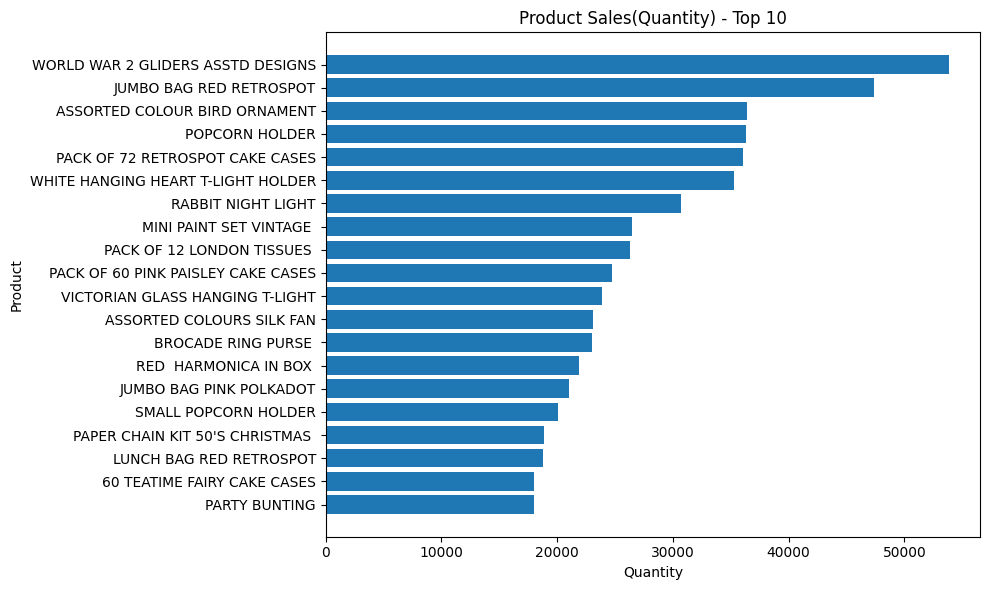

In [ ]:
positive_quantities_products = positive_quantities_products.head(20).iloc[::-1]
plt.figure(figsize=(10, 6))
plt.barh(positive_quantities_products['Description'], positive_quantities_products['Quantity'])
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.title('Product Sales(Quantity) - Top 10')
# plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### No Sales Product

In [ ]:
zero_quantities_products = zero_quantities.drop(zero_quantities.index[0])
zero_quantities_products

,Description,Quantity
161,HANGING RIDGE GLASS T-LIGHT HOLDER,0
162,BLACK CHERRY LIGHTS,0
163,WHITE BEADED GARLAND STRING 20LIGHT,0
164,GLASS CAKE COVER AND PLATE,0
165,"PAPER CRAFT , LITTLE BIRDIE",0


In [ ]:
negative_quantities

,Description,Quantity
0,printing smudges/thrown away,-19200
1,"Unsaleable, destroyed.",-15644
2,check,-12030
3,Printing smudges/thrown away,-9058
4,Damaged,-7540
...,...,...
155,PORCELAIN HANGING BELL SMALL,-1
156,3 WICK CHRISTMAS BRIAR CANDLE,-1
157,CREAM SWEETHEART SHELF + HOOKS,-1
158,CREAM SWEETHEART TRAYS,-1


## Customer Based Classification

# FROM KAGGLE

In [230]:
import matplotlib.pyplot as plt


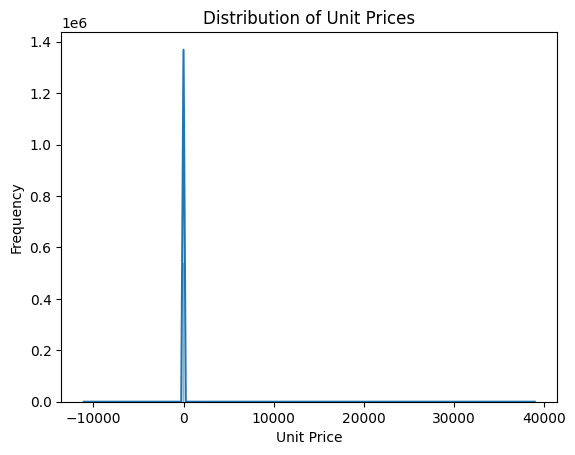

In [231]:
sns.histplot(data['UnitPrice'], bins=1000, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14304\3372867512.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




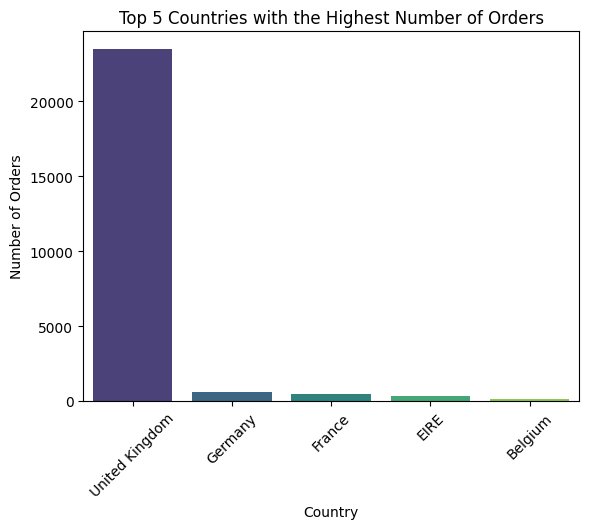

In [232]:
top_countries = data.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(5)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 5 Countries with the Highest Number of Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

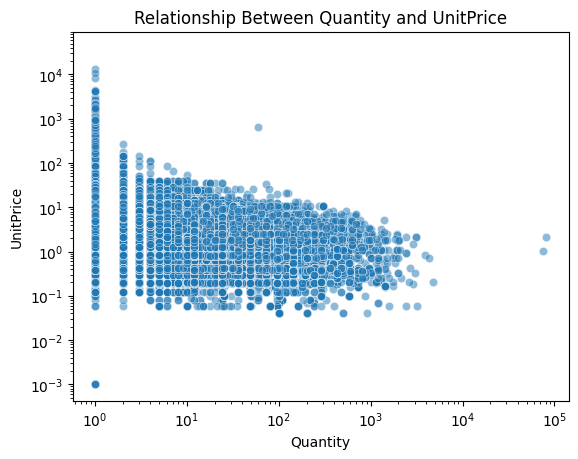

In [233]:
sns.scatterplot(data=data, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Relationship Between Quantity and UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.xscale('log') # Optional, based on data distribution
plt.yscale('log') # Optional, based on data distribution
plt.show()